In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. VERİ YÜKLEME
# Dosya kodun yanında olduğu için sadece ismini yazmamız yeterli
file_path = 'TMDB_tv_dataset_v3.csv'

try:
    df = pd.read_csv(file_path)
    print("✅ Veri seti başarıyla yüklendi.")
    print(f"Veri Boyutu: {df.shape[0]} satır, {df.shape[1]} sütun ")
except FileNotFoundError:
    print("❌ HATA: Dosya bulunamadı. Lütfen klasörü kontrol et!")

# 2. TEMİZLİK (Gereksiz sütunları atma)
drop_cols = ['id', 'name', 'original_name']
df_clean = df.drop(columns=[col for col in drop_cols if col in df.columns])

# 3. HEDEF DEĞİŞKEN (Log Dönüşümü - Elif'in istediği kritik adım)
# Popülerlik skorunu daha dengeli hale getiriyoruz
y = np.log1p(df_clean['popularity'])
X = df_clean.drop(columns=['popularity'])

# 4. KATEGORİK DEĞİŞKENLER (Bilgisayarı kasmayan hızlı yöntem)
print("⏳ Kategorik veriler dönüştürülüyor (Lütfen bekleyin)...")
categorical_cols = X.select_dtypes(include=['object']).columns

for col in categorical_cols:
    # Sadece en popüler 20 değeri al, gerisine 'Other' de
    top_categories = X[col].value_counts().index[:20]
    X[col] = X[col].where(X[col].isin(top_categories), 'Other')

# One-Hot Encoding
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# 5. VERİ BÖLME (%80 Eğitim - %20 Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. ÖLÇEKLENDİRME
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\n🚀 HAZIRLIK TAMAMLANDI! Modelleri kurmaya başlayabiliriz.")

✅ Veri seti başarıyla yüklendi.
Veri Boyutu: 168639 satır, 29 sütun 
⏳ Kategorik veriler dönüştürülüyor (Lütfen bekleyin)...

🚀 HAZIRLIK TAMAMLANDI! Modelleri kurmaya başlayabiliriz.


In [2]:
# --- 1. ADIM: Kütüphaneler ---
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Görselleştirme stili ayarı (Grafikler daha şık görünür)
sns.set(style="whitegrid")

print("✅ 1. Adım Tamam: Kütüphaneler başarıyla yüklendi.")

✅ 1. Adım Tamam: Kütüphaneler başarıyla yüklendi.


In [3]:
# --- 2. ADIM: Modelin Tanımlanması ---

print("⚙️ Model parametreleri ayarlanıyor...")

# RandomForestRegressor:
# n_estimators=100 -> 100 farklı karar ağacı kullanılacak.
# random_state=42  -> Her denemede aynı sonucu almak için sabitlendi.
# n_jobs=-1        -> Bilgisayarın tüm gücünü kullanarak hızlandırır.
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

print("✅ 2. Adım Tamam: Random Forest modeli (henüz eğitilmemiş halde) oluşturuldu.")

⚙️ Model parametreleri ayarlanıyor...
✅ 2. Adım Tamam: Random Forest modeli (henüz eğitilmemiş halde) oluşturuldu.


In [4]:
# --- 3. ADIM: Model Eğitimi (Fitting) ---

print("⏳ Model eğitimi başladı, lütfen bekleyin...")

# X_train_scaled: Ders notları (Girdi verisi)
# y_train: Cevap anahtarı (Gerçek popülerlik değerleri)
rf_model.fit(X_train_scaled, y_train)

print("✅ 3. Adım Tamam: Model eğitimi başarıyla bitti.")

⏳ Model eğitimi başladı, lütfen bekleyin...
✅ 3. Adım Tamam: Model eğitimi başarıyla bitti.


In [5]:
# --- 4. ADIM: Test ve Değerlendirme ---

# 1. Tahmin Yap (Test setindeki soruları çöz)
y_pred_rf = rf_model.predict(X_test_scaled)

# 2. Hataları Hesapla
mse_rf = mean_squared_error(y_test, y_pred_rf) # Hata Karesi
rmse_rf = np.sqrt(mse_rf) # Ortalama Sapma (Puan cinsinden)
r2_rf = r2_score(y_test, y_pred_rf) # Başarı Yüzdesi

# 3. Sonuçları Yazdır
print("-" * 40)
print(f"📊 RANDOM FOREST PERFORMANS RAPORU")
print("-" * 40)
print(f"MSE (Hata Kare Ort.) : {mse_rf:.5f}")
print(f"RMSE (Ortalama Sapma): {rmse_rf:.5f} (Daha düşük daha iyi)")
print(f"R2 Skoru (Başarı %)  : {r2_rf:.5f} (1'e ne kadar yakınsa o kadar iyi)")
print("-" * 40)

----------------------------------------
📊 RANDOM FOREST PERFORMANS RAPORU
----------------------------------------
MSE (Hata Kare Ort.) : 0.22599
RMSE (Ortalama Sapma): 0.47539 (Daha düşük daha iyi)
R2 Skoru (Başarı %)  : 0.71548 (1'e ne kadar yakınsa o kadar iyi)
----------------------------------------


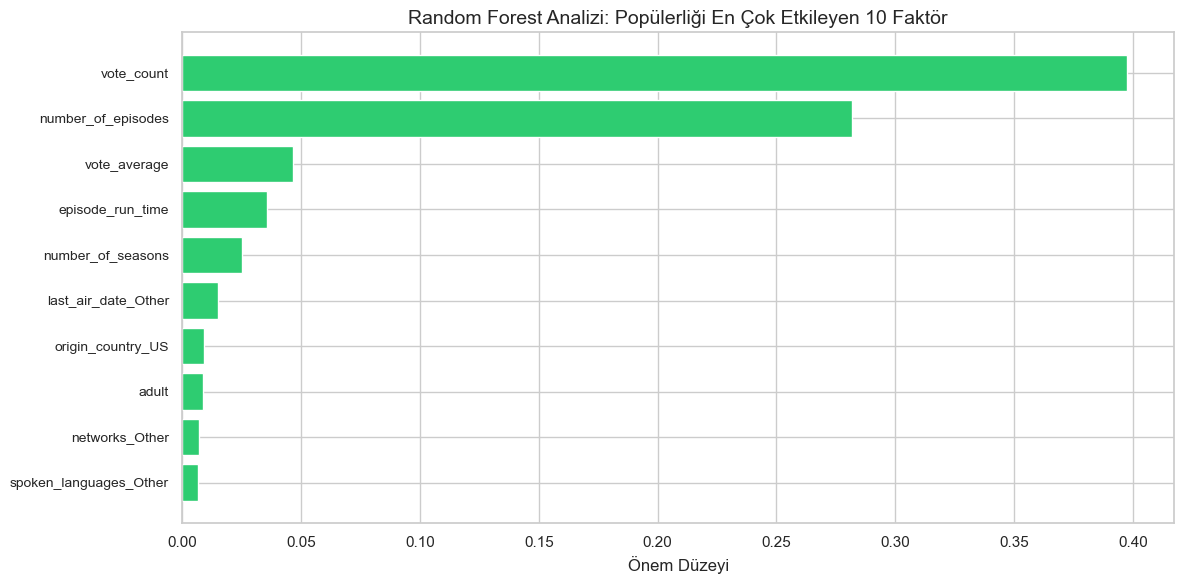

✅ 5. Adım Tamam: Grafik ekrana basıldı.


In [6]:
# --- 5. ADIM: Görselleştirme (Feature Importance) ---

# Sütun isimlerini al
feature_names = X.columns 

# Modelden önem değerlerini çek
importances = rf_model.feature_importances_

# En önemli 10 özelliği sırala
indices = np.argsort(importances)[-10:] 

# Grafik Çiz
plt.figure(figsize=(12, 6))
plt.title("Random Forest Analizi: Popülerliği En Çok Etkileyen 10 Faktör", fontsize=14)
plt.barh(range(len(indices)), importances[indices], color='#2ecc71', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices], fontsize=10)
plt.xlabel('Önem Düzeyi', fontsize=12)
plt.tight_layout()
plt.show()

print("✅ 5. Adım Tamam: Grafik ekrana basıldı.")

In [7]:
# --- 1. ADIM: Extra Trees Modelini Tanımlama ---
from sklearn.ensemble import ExtraTreesRegressor

print("⚡ Extra Trees modeli hazırlanıyor...")

# Parametreler Random Forest ile aynı mantıktadır
# n_estimators=100 -> 100 ağaç
# random_state=42  -> Sonuçlar tutarlı olsun diye
# n_jobs=-1        -> Maksimum hız
et_model = ExtraTreesRegressor(n_estimators=100, random_state=42, n_jobs=-1)

print("✅ 1. Adım Tamam: Extra Trees tanımlandı.")

⚡ Extra Trees modeli hazırlanıyor...
✅ 1. Adım Tamam: Extra Trees tanımlandı.


In [8]:
# --- 2. ADIM: Model Eğitimi (Fitting) ---

print("⏳ Extra Trees eğitiliyor (Genelde RF'den daha hızlıdır)...")

et_model.fit(X_train_scaled, y_train)

print("✅ 2. Adım Tamam: Eğitim bitti.")

⏳ Extra Trees eğitiliyor (Genelde RF'den daha hızlıdır)...
✅ 2. Adım Tamam: Eğitim bitti.


In [9]:
# --- 3. ADIM: Performans Ölçümü ---
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

# Tahmin
y_pred_et = et_model.predict(X_test_scaled)

# Metrikler
mse_et = mean_squared_error(y_test, y_pred_et)
rmse_et = np.sqrt(mse_et)
r2_et = r2_score(y_test, y_pred_et)

print("-" * 40)
print(f"⚡ EXTRA TREES PERFORMANS RAPORU")
print("-" * 40)
print(f"MSE (Hata Kare Ort.) : {mse_et:.5f}")
print(f"RMSE (Ortalama Sapma): {rmse_et:.5f}")
print(f"R2 Skoru (Başarı %)  : {r2_et:.5f}")
print("-" * 40)

# Küçük bir kıyaslama notu:
if 'r2_rf' in locals(): # Eğer önceki RF kodu çalıştıysa kıyaslar
    fark = r2_et - r2_rf
    durum = "DAHA İYİ" if fark > 0 else "DAHA DÜŞÜK"
    print(f"KIYASLAMA: Extra Trees, Random Forest'a göre {abs(fark):.5f} puan {durum} performans gösterdi.")

----------------------------------------
⚡ EXTRA TREES PERFORMANS RAPORU
----------------------------------------
MSE (Hata Kare Ort.) : 0.23974
RMSE (Ortalama Sapma): 0.48964
R2 Skoru (Başarı %)  : 0.69817
----------------------------------------
KIYASLAMA: Extra Trees, Random Forest'a göre 0.01731 puan DAHA DÜŞÜK performans gösterdi.


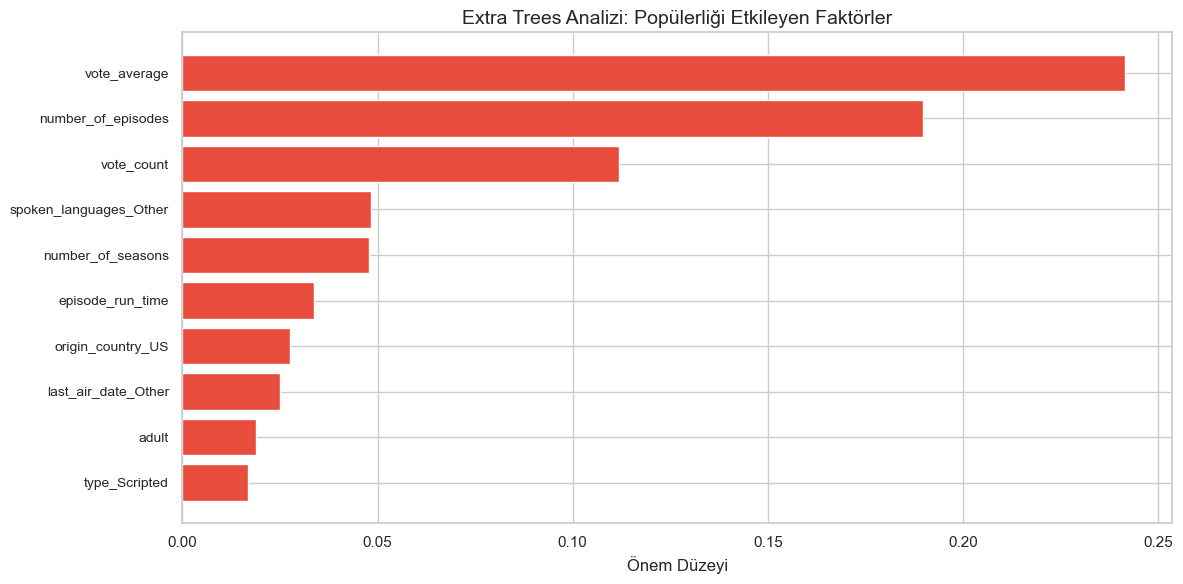

✅ Tüm adımlar tamamlandı.


In [10]:
# --- 4. ADIM: Görselleştirme ---
import matplotlib.pyplot as plt

feature_names = X.columns 
importances_et = et_model.feature_importances_
indices_et = np.argsort(importances_et)[-10:] 

plt.figure(figsize=(12, 6))
plt.title("Extra Trees Analizi: Popülerliği Etkileyen Faktörler", fontsize=14)
plt.barh(range(len(indices_et)), importances_et[indices_et], color='#e74c3c', align='center') # Kırmızı tonu
plt.yticks(range(len(indices_et)), [feature_names[i] for i in indices_et], fontsize=10)
plt.xlabel('Önem Düzeyi', fontsize=12)
plt.tight_layout()
plt.show()

print("✅ Tüm adımlar tamamlandı.")

In [11]:
# --- 0. GÜVENLİK ADIMI: Otomatik Kütüphane Yükleyici ---
import sys
import subprocess
import time

def kutuphane_kontrol(paket_adi):
    try:
        # Kütüphaneyi çağırmayı dene
        __import__(paket_adi)
        print(f"✅ {paket_adi} kütüphanesi zaten yüklü, devam ediliyor...")
    except ImportError:
        # Hata verirse yüklemeyi başlat
        print(f"⚠️ {paket_adi} bulunamadı. Otomatik yükleniyor, lütfen bekleyin...")
        subprocess.check_call([sys.executable, "-m", "pip", "install", paket_adi])
        print(f"🎉 {paket_adi} başarıyla yüklendi! Şimdi kod çalıştırılıyor...")
        time.sleep(2) # Sistemin toparlaması için 2 saniye bekle

# PyTorch'u kontrol et ve gerekirse yükle
kutuphane_kontrol('torch')

# --- 1. ADIM: PyTorch Veri Hazırlığı ---
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

# Cihaz Seçimi (Otomatik)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"🔥 Model şu donanım üzerinde çalışacak: {device}")

# ÖNEMLİ: Önceki adımlardan gelen verileri (X_train_scaled vb.) kullanıyoruz.
# Verileri PyTorch'un anlayacağı 'Tensor' formatına çevirip cihaza gönderiyoruz.
print("⏳ Veriler Tensor formatına çevriliyor...")

X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32).to(device)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32).to(device)

y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1).to(device)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1).to(device)

input_dim = X_train_tensor.shape[1] # Giriş özellik sayısı

print(f"✅ 1. Adım Başarıyla Tamamlandı!")
print(f"   -> İşlenecek Özellik Sayısı: {input_dim}")
print(f"   -> Veri Tipi: {X_train_tensor.dtype}")

⚠️ torch bulunamadı. Otomatik yükleniyor, lütfen bekleyin...
🎉 torch başarıyla yüklendi! Şimdi kod çalıştırılıyor...
🔥 Model şu donanım üzerinde çalışacak: cpu
⏳ Veriler Tensor formatına çevriliyor...
✅ 1. Adım Başarıyla Tamamlandı!
   -> İşlenecek Özellik Sayısı: 338
   -> Veri Tipi: torch.float32


In [12]:
# --- 2. ADIM: Model Mimarisinin Tanımlanması ---

# Eğer torch kütüphanesi import edilmediyse tekrar tanımlayalım (Garanti olsun)
import torch
import torch.nn as nn

class WideAndDeepModel(nn.Module):
    def __init__(self, input_dim):
        super(WideAndDeepModel, self).__init__()
        
        # --- A) DEEP (DERİN) KISIM ---
        # Verideki karmaşık, gizli ilişkileri öğrenir.
        self.deep_layer = nn.Sequential(
            nn.Linear(input_dim, 128), # 1. Gizli Katman
            nn.ReLU(),                 # Aktivasyon 
            nn.Dropout(0.3),           # Ezberlemeyi önler
            
            nn.Linear(128, 64),        # 2. Gizli Katman
            nn.ReLU(),                 
            nn.Dropout(0.3)            
        )
        
        # --- B) WIDE (GENİŞ) KISIM ---
        # Verideki basit kuralları öğrenir.
        self.wide_layer = nn.Linear(input_dim, 64)
        
        # --- C) BİRLEŞTİRME (OUTPUT) ---
        # Wide ve Deep çıktılarını birleştirip tek bir puan üretir
        self.final_layer = nn.Linear(64 + 64, 1)
        
    def forward(self, x):
        deep_out = self.deep_layer(x)   # Derin yoldan git
        wide_out = self.wide_layer(x)   # Geniş yoldan git
        combined = torch.cat((deep_out, wide_out), dim=1) # Birleştir
        output = self.final_layer(combined) # Tahmin üret
        return output

# Modeli yaratıyoruz
# input_dim değişkeni 1. Adımdan geliyor, o yüzden 1. Adımın bitmesi şart!
wd_model = WideAndDeepModel(input_dim).to(device)

print("✅ 2. Adım Tamam: Wide & Deep mimarisi kuruldu.")
print(wd_model) # Modelin özetini ekrana basar

✅ 2. Adım Tamam: Wide & Deep mimarisi kuruldu.
WideAndDeepModel(
  (deep_layer): Sequential(
    (0): Linear(in_features=338, out_features=128, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.3, inplace=False)
    (3): Linear(in_features=128, out_features=64, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.3, inplace=False)
  )
  (wide_layer): Linear(in_features=338, out_features=64, bias=True)
  (final_layer): Linear(in_features=128, out_features=1, bias=True)
)


In [13]:
# --- 3. ADIM: Model Eğitimi (Training Loop) ---
import torch.optim as optim

print("⚙️ Eğitim ayarları yapılıyor...")

# 1. Hata Hesaplama Yöntemi (Loss Function)
# Regresyon (puan tahmini) yaptığımız için MSE (Hata Kareleri Ortalaması) kullanıyoruz.
criterion = nn.MSELoss()

# 2. Optimizasyon (Öğretmen)
# Adam algoritması, hatayı azaltmak için modelin ağırlıklarını günceller.
# lr=0.001 (Learning Rate): Öğrenme hızıdır.
optimizer = optim.Adam(wd_model.parameters(), lr=0.001)

# 3. Eğitim Döngüsü
epochs = 100  # Veriyi baştan sona 100 kere görecek
loss_history = [] # Hata değişimini grafikte görmek için saklayacağız

print(f"🚀 Eğitim başlıyor... ({epochs} Epoch)")

# Modeli eğitim moduna al (Dropout gibi özellikleri açar)
wd_model.train()

for epoch in range(epochs):
    # A) Geçmişi Temizle: Önceki adımdan kalan gradyanları sıfırla
    optimizer.zero_grad()
    
    # B) Tahmin Yap (Forward Pass): Veriyi modelden geçir
    outputs = wd_model(X_train_tensor)
    
    # C) Hatayı Ölç: Tahmin ile Gerçek (y_train) arasındaki farka bak
    loss = criterion(outputs, y_train_tensor)
    
    # D) Geri Yayılım (Backward Pass): Hatayı geriye doğru takip et
    loss.backward()
    
    # E) Güncelle (Optimizer Step): Ağırlıkları hatayı azaltacak şekilde değiştir
    optimizer.step()
    
    # Kayıt tut
    loss_history.append(loss.item())
    
    # İlerlemeyi ekrana yazdır (Her 10 adımda bir)
    if (epoch+1) % 10 == 0:
        print(f"   -> Epoch {epoch+1}/{epochs} | Loss (Hata): {loss.item():.4f}")

print("✅ 3. Adım Tamam: Model eğitimi başarıyla bitti.")

⚙️ Eğitim ayarları yapılıyor...
🚀 Eğitim başlıyor... (100 Epoch)
   -> Epoch 10/100 | Loss (Hata): 0.6497
   -> Epoch 20/100 | Loss (Hata): 0.5515
   -> Epoch 30/100 | Loss (Hata): 0.4852
   -> Epoch 40/100 | Loss (Hata): 0.4550
   -> Epoch 50/100 | Loss (Hata): 0.4416
   -> Epoch 60/100 | Loss (Hata): 0.4312
   -> Epoch 70/100 | Loss (Hata): 0.4211
   -> Epoch 80/100 | Loss (Hata): 0.4167
   -> Epoch 90/100 | Loss (Hata): 0.4099
   -> Epoch 100/100 | Loss (Hata): 0.4046
✅ 3. Adım Tamam: Model eğitimi başarıyla bitti.


📝 Test aşaması başlatılıyor...
----------------------------------------
🧠 PYTORCH WIDE & DEEP PERFORMANS RAPORU
----------------------------------------
MSE (Hata Kare Ort.) : 0.38717
RMSE (Ortalama Sapma): 0.62223 (Daha düşük daha iyi)
R2 Skoru (Başarı %)  : 0.51256 (1'e ne kadar yakınsa o kadar iyi)
----------------------------------------


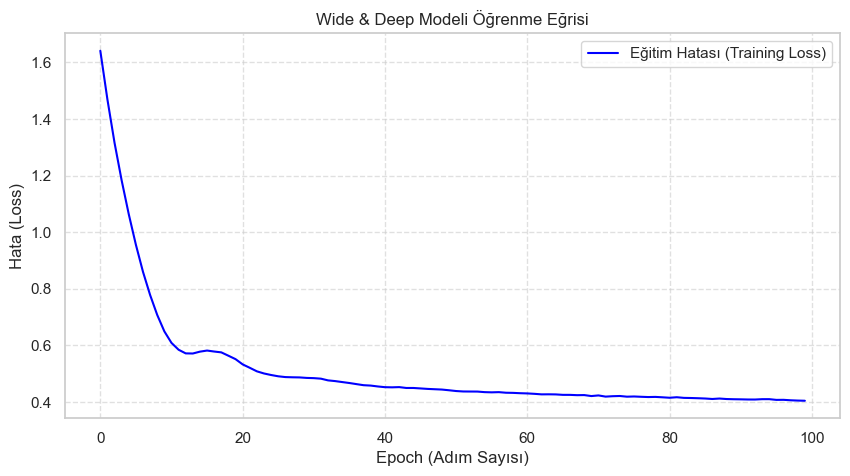

✅ 4. Adım Tamamlandı.


In [14]:
# --- 4. ADIM: Test ve Değerlendirme ---
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

print("📝 Test aşaması başlatılıyor...")

# 1. Değerlendirme Modu
# Dropout gibi sadece eğitimde çalışan özellikleri kapatır.
wd_model.eval() 

# 2. Tahmin Yap (Gradyan hesaplamadan - Hafıza tasarrufu)
with torch.no_grad():
    # Test verisini modele soruyoruz
    test_predictions = wd_model(X_test_tensor)
    
    # 3. Sonuçları Geri Çevirme (Tensor -> Numpy)
    # Scikit-learn kütüphanesi GPU'daki Tensor'u anlamaz.
    # O yüzden veriyi önce CPU'ya çekip (.cpu()), sonra Numpy dizisine (.numpy()) çeviriyoruz.
    y_pred_wd = test_predictions.cpu().numpy()
    y_true_wd = y_test_tensor.cpu().numpy()

# 4. Metrikleri Hesapla
mse_wd = mean_squared_error(y_true_wd, y_pred_wd)
rmse_wd = np.sqrt(mse_wd) # Hatanın karekökü (Puan cinsinden sapma)
r2_wd = r2_score(y_true_wd, y_pred_wd) # Başarı yüzdesi

# 5. Sonuçları Yazdır
print("-" * 40)
print(f"🧠 PYTORCH WIDE & DEEP PERFORMANS RAPORU")
print("-" * 40)
print(f"MSE (Hata Kare Ort.) : {mse_wd:.5f}")
print(f"RMSE (Ortalama Sapma): {rmse_wd:.5f} (Daha düşük daha iyi)")
print(f"R2 Skoru (Başarı %)  : {r2_wd:.5f} (1'e ne kadar yakınsa o kadar iyi)")
print("-" * 40)

# --- GRAFİK: Model Nasıl Öğrendi? ---
plt.figure(figsize=(10, 5))
plt.plot(loss_history, label='Eğitim Hatası (Training Loss)', color='blue')
plt.title("Wide & Deep Modeli Öğrenme Eğrisi")
plt.xlabel("Epoch (Adım Sayısı)")
plt.ylabel("Hata (Loss)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()

print("✅ 4. Adım Tamamlandı.")

In [15]:
# --- 1. ADIM: Garanti Kurulum ve Simple MLP Mimarisi ---
import torch
import torch.nn as nn
import numpy as np

# 1. Cihazı Tekrar Belirle (Hafızadan silindiyse diye)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"🔥 Donanım Kontrolü: {device} kullanılıyor.")

# 2. Giriş Boyutunu (Input Dim) Taze Olarak Hesapla
# X_train_tensor'un hafızada olduğunu varsayıyoruz (Veri yükleme adımı yapıldığı için)
# Ancak input_dim değişkeni silinmiş olabilir, onu yeniden oluşturuyoruz.
try:
    input_dim = X_train_tensor.shape[1]
    print(f"📏 Giriş Özellik Sayısı (Input Dim): {input_dim}")
except NameError:
    print("❌ KRİTİK HATA: 'X_train_tensor' bulunamadı! Lütfen en baştaki Veri Yükleme adımını çalıştırın.")

# 3. Model Sınıfı
class SimpleMLP(nn.Module):
    def __init__(self, input_dim):
        super(SimpleMLP, self).__init__()
        
        # Basit ama etkili katman yapısı
        self.layers = nn.Sequential(
            # Katman 1: Giriş -> 128 Nöron
            nn.Linear(input_dim, 128),
            nn.ReLU(),       # Öğrenme fonksiyonu
            nn.Dropout(0.2), # %20 unutma (Ezberlemeyi önler)
            
            # Katman 2: 128 -> 64 Nöron
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(0.2),
            
            # Katman 3: 64 -> 32 Nöron
            nn.Linear(64, 32),
            nn.ReLU(),
            
            # Çıkış Katmanı: Tek bir puan tahmini
            nn.Linear(32, 1)
        )
        
    def forward(self, x):
        return self.layers(x)

# 4. Modeli Oluştur ve Cihaza Gönder
# input_dim'i yukarıda hesapladığımız için hata vermez.
mlp_model = SimpleMLP(input_dim).to(device)

print("✅ 1. Adım Tamam: Simple MLP modeli sıfırdan ve güvenli şekilde kuruldu.")
print(mlp_model)

🔥 Donanım Kontrolü: cpu kullanılıyor.
📏 Giriş Özellik Sayısı (Input Dim): 338
✅ 1. Adım Tamam: Simple MLP modeli sıfırdan ve güvenli şekilde kuruldu.
SimpleMLP(
  (layers): Sequential(
    (0): Linear(in_features=338, out_features=128, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2, inplace=False)
    (3): Linear(in_features=128, out_features=64, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.2, inplace=False)
    (6): Linear(in_features=64, out_features=32, bias=True)
    (7): ReLU()
    (8): Linear(in_features=32, out_features=1, bias=True)
  )
)


In [16]:
# --- 2. ADIM: Simple MLP Eğitimi ---
import torch.optim as optim

print("🚀 Simple MLP eğitimi başlıyor...")

# 1. Hata ve Optimizasyon Ayarları
criterion = nn.MSELoss() # Hata ölçer (Kareler farkı)
optimizer = optim.Adam(mlp_model.parameters(), lr=0.001) # Öğretmen (Ağırlıkları günceller)

# 2. Eğitim Döngüsü
epochs = 100
loss_history_mlp = [] # Grafikte çizdirmek için hataları saklayacağız

mlp_model.train() # Modeli 'Eğitim Modu'na al

for epoch in range(epochs):
    # Temizlik
    optimizer.zero_grad()
    
    # İleri Git (Tahmin)
    outputs = mlp_model(X_train_tensor)
    
    # Hatayı Ölç
    loss = criterion(outputs, y_train_tensor)
    
    # Geri Git (Öğren)
    loss.backward()
    
    # Güncelle
    optimizer.step()
    
    # Kayıt
    loss_history_mlp.append(loss.item())
    
    # Bilgilendirme
    if (epoch+1) % 10 == 0:
        print(f"   -> Epoch {epoch+1}/{epochs} | Loss (Hata): {loss.item():.4f}")

print("✅ 2. Adım Tamam: Simple MLP eğitimi bitti.")

🚀 Simple MLP eğitimi başlıyor...
   -> Epoch 10/100 | Loss (Hata): 1.2301
   -> Epoch 20/100 | Loss (Hata): 0.6996
   -> Epoch 30/100 | Loss (Hata): 0.5226
   -> Epoch 40/100 | Loss (Hata): 0.4859
   -> Epoch 50/100 | Loss (Hata): 0.4622
   -> Epoch 60/100 | Loss (Hata): 0.4430
   -> Epoch 70/100 | Loss (Hata): 0.4319
   -> Epoch 80/100 | Loss (Hata): 0.4202
   -> Epoch 90/100 | Loss (Hata): 0.4107
   -> Epoch 100/100 | Loss (Hata): 0.3999
✅ 2. Adım Tamam: Simple MLP eğitimi bitti.


📝 Simple MLP test ediliyor...
----------------------------------------
🧠 PYTORCH SIMPLE MLP PERFORMANS RAPORU
----------------------------------------
MSE (Hata Kare Ort.) : 0.38162
RMSE (Ortalama Sapma): 0.61776
R2 Skoru (Başarı %)  : 0.51954
----------------------------------------


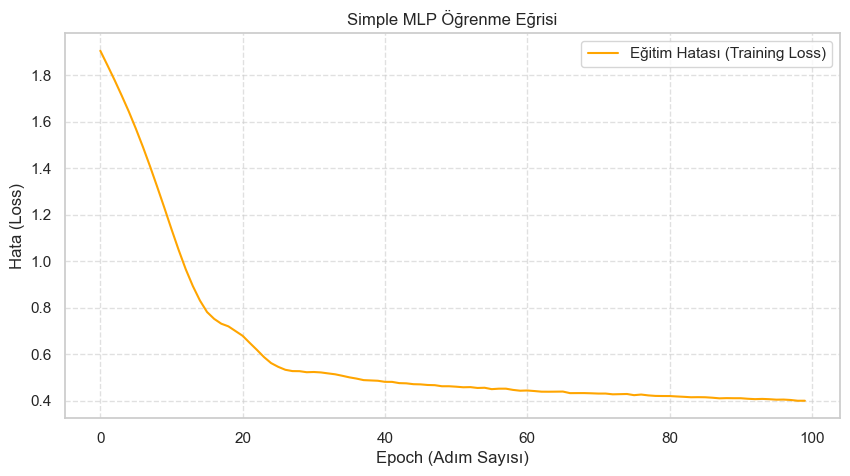

✅ Tüm işlemler tamamlandı.


In [17]:
# --- 3. ADIM: Test ve Değerlendirme ---
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

print("📝 Simple MLP test ediliyor...")

# 1. Değerlendirme Modu (Evaluation Mode)
# Dropout gibi sadece eğitimde çalışan özellikleri kapatır.
mlp_model.eval()

# 2. Tahmin Yap (Hafıza tasarrufu için gradyan hesaplama kapatılır)
with torch.no_grad():
    # Test verisini modele soruyoruz
    test_predictions = mlp_model(X_test_tensor)
    
    # 3. Sonuçları Geri Çevirme (Tensor -> Numpy)
    # Scikit-learn hesaplama yapmak için Numpy formatı ister.
    y_pred_mlp = test_predictions.cpu().numpy()
    y_true_mlp = y_test_tensor.cpu().numpy()

# 4. Metrikleri Hesapla
mse_mlp = mean_squared_error(y_true_mlp, y_pred_mlp)
rmse_mlp = np.sqrt(mse_mlp) # Ortalama Sapma (Puan cinsinden)
r2_mlp = r2_score(y_true_mlp, y_pred_mlp) # Başarı Yüzdesi

# 5. Sonuçları Yazdır
print("-" * 40)
print(f"🧠 PYTORCH SIMPLE MLP PERFORMANS RAPORU")
print("-" * 40)
print(f"MSE (Hata Kare Ort.) : {mse_mlp:.5f}")
print(f"RMSE (Ortalama Sapma): {rmse_mlp:.5f}")
print(f"R2 Skoru (Başarı %)  : {r2_mlp:.5f}")
print("-" * 40)

# --- GRAFİK: Model Nasıl Öğrendi? ---
plt.figure(figsize=(10, 5))
plt.plot(loss_history_mlp, label='Eğitim Hatası (Training Loss)', color='orange')
plt.title("Simple MLP Öğrenme Eğrisi")
plt.xlabel("Epoch (Adım Sayısı)")
plt.ylabel("Hata (Loss)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()

print("✅ Tüm işlemler tamamlandı.")